### Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification




c:\users\krish.naik\appdata\local\continuum\anaconda3\envs\pycaret\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\krish.naik\appdata\local\continuum\anaconda3\envs\pycaret\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [6]:
X.shape

(2000, 20)

In [10]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [57]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9829777777777778


In [58]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.02, 0.98],
       ...,
       [0.98, 0.02],
       [0.96, 0.04],
       [0.22, 0.78]])

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [39]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9852333333333333


In [42]:
pd.concat(pred,axis=1)

0         1         2    3
0    0.97  0.991861  0.559186  1.0
1    0.00  0.000008  0.463282  0.0
2    1.00  0.966929  0.538202  0.8
3    0.89  0.761539  0.509875  0.8
4    0.62  0.779443  0.490344  0.4
..    ...       ...       ...  ...
595  0.00  0.024239  0.461121  0.0
596  0.02  0.000003  0.441377  0.0
597  0.99  0.984385  0.532403  1.0
598  0.00  0.001147  0.441720  0.2
599  0.99  0.989540  0.559890  0.8

[600 rows x 4 columns]

In [41]:
final_prediction

0      0.880262
1      0.115823
2      0.826283
3      0.740353
4      0.572447
         ...   
595    0.121340
596    0.115345
597    0.876697
598    0.160717
599    0.834857
Length: 600, dtype: float64

In [53]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9109413 , 0.9109413 , 0.90656694, 0.90577475, 0.80702418,
       0.80662833, 0.79061406, 0.7905558 , 0.76874415, 0.76821156,
       0.76797605, 0.76787124, 0.72925756, 0.72887362, 0.69721721,
       0.69393711, 0.67147732, 0.66743537, 0.61529968, 0.59864346,
       0.59406376, 0.58736186, 0.58396627, 0.58050386, 0.56838469,
       0.56719563, 0.56327749, 0.55889283, 0.54345371, 0.53877948,
       0.52615858, 0.47116892, 0.45669266, 0.44222765, 0.4371034 ,
       0.39920009, 0.39629719, 0.35018074, 0.34836612, 0.24823004,
       0.24390421, 0.20713088, 0.20348417, 0.12551207, 0.1253351 ,
       0.10632697])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

thresholds  accuracy
33    0.442228  0.961667
34    0.437103  0.960000
32    0.456693  0.960000
31    0.471169  0.958333
29    0.538779  0.958333

In [55]:
accuracy_ls

thresholds  accuracy
33    0.442228  0.961667
34    0.437103  0.960000
32    0.456693  0.960000
31    0.471169  0.958333
29    0.538779  0.958333
30    0.526159  0.956667
28    0.543454  0.956667
25    0.567196  0.955000
27    0.558893  0.955000
35    0.399200  0.953333
24    0.568385  0.953333
26    0.563277  0.953333
36    0.396297  0.951667
23    0.580504  0.950000
22    0.583966  0.948333
18    0.615300  0.943333
19    0.598643  0.943333
21    0.587362  0.943333
20    0.594064  0.941667
37    0.350181  0.940000
38    0.348366  0.938333
17    0.667435  0.931667
16    0.671477  0.930000
15    0.693937  0.925000
14    0.697217  0.923333
13    0.728874  0.910000
12    0.729258  0.908333
39    0.248230  0.886667
40    0.243904  0.885000
11    0.767871  0.853333
9     0.768212  0.853333
8     0.768744  0.851667
10    0.767976  0.851667
41    0.207131  0.850000
42    0.203484  0.850000
7     0.790556  0.825000
6     0.790614  0.823333
5     0.806628  0.803333
4     0.807024  0.801667
43    0.125512  0.703333
44    0.125335  0.701667
3     0.905775  0.506667
2     0.906567  0.505000
45    0.106327  0.501667
1     0.910941  0.500000
0     1.910941  0.500000

In [52]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

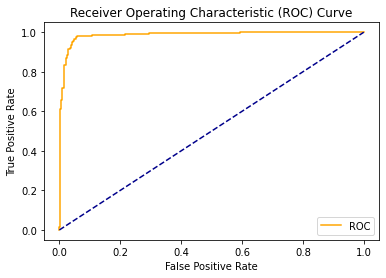

In [56]:
plot_roc_curve(fpr,tpr)